# Divisive Clustering

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ML Course/K Means/SuperMarket Customers.csv')


In [ ]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


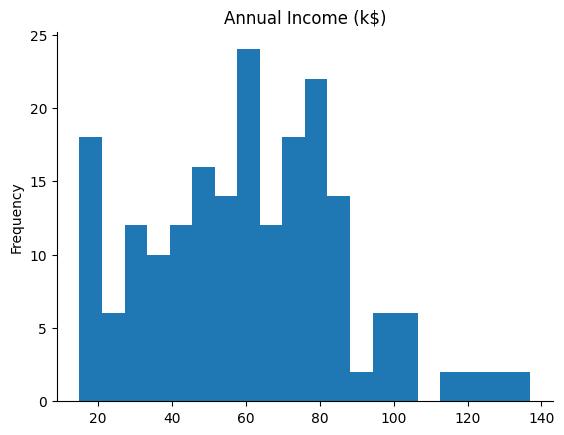

In [ ]:
from matplotlib import pyplot as plt
dataset['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

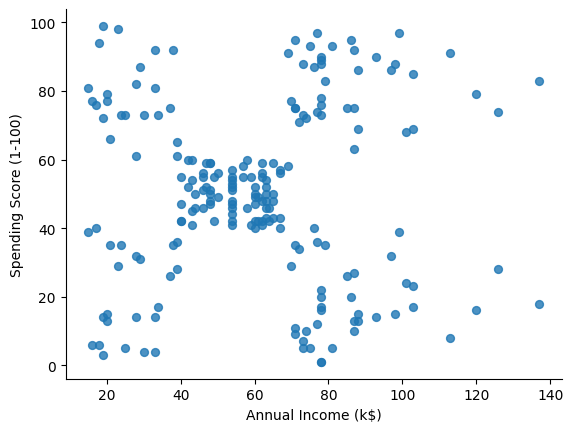

In [ ]:
from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
dataset.ndim

2

In [ ]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
dataset.drop('CustomerID', axis=1, inplace=True)

In [ ]:
X = dataset.iloc[:, [2, 3]].values

**Using the dendrogram to find the optimal number of clusters**

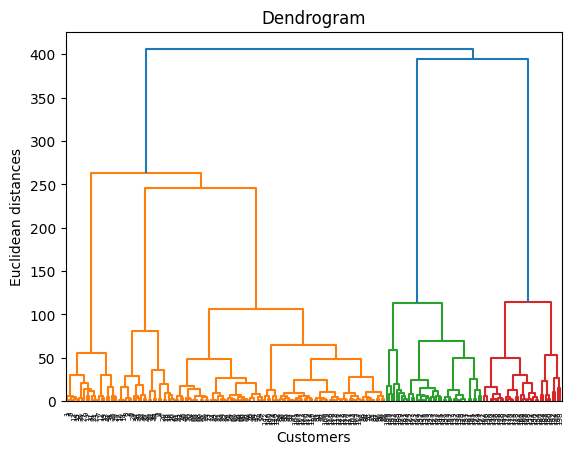

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [ ]:
def divisive_clustering(X, n_clusters):
    cluster = np.arange(len(X))

    clusters_at_each_step = [cluster.copy()]

    while len(clusters_at_each_step) < n_clusters:

        split_cluster = np.argmax(np.var(X[cluster], axis=0))


        indices_sub_cluster1 = cluster[X[cluster, split_cluster] <= np.median(X[cluster, split_cluster])]
        indices_sub_cluster2 = cluster[X[cluster, split_cluster] > np.median(X[cluster, split_cluster])]

        cluster = indices_sub_cluster1
        clusters_at_each_step.append(cluster.copy())

        cluster = indices_sub_cluster2
        clusters_at_each_step.append(cluster.copy())

    return clusters_at_each_step

n_desired_clusters = 5
divisive_clusters = divisive_clustering(X, n_desired_clusters)


## Visualising the clusters

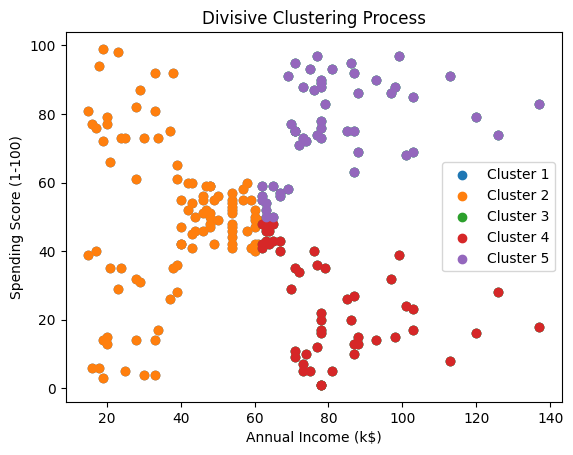

In [ ]:
def plot_divisive_dendrogram(X, clusters_at_each_step):
    for i, cluster_indices in enumerate(clusters_at_each_step):
        plt.scatter(X[cluster_indices, 0], X[cluster_indices, 1], label=f'Cluster {i + 1}')

    plt.title('Divisive Clustering Process')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.show()

plot_divisive_dendrogram(X, divisive_clusters)